# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [32]:
# Define the API base URL and API key
url = "https://api.openweathermap.org/data/2.5/weather?"
api_key = '17ea832227e93711a469e5beb4f691aa'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | nagqu
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | naze
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | st. john's
Processing Record 11 of Set 1 | sault ste. marie
Processing Record 12 of Set 1 | nueva gerona
Processing Record 13 of Set 1 | vadso
Processing Record 14 of Set 1 | kerikeri
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | pangoa
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | tazovsky
Processing Record 19 of Set 1 | bundi
Processing Record 20 of Set 1 | ciudad valles
Processing Record 21 of Set 1 | ketchikan
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of

In [33]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [34]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,24.22,69,20,6.71,PT,1720001863
1,grytviken,-54.2811,-36.5092,-4.93,76,7,2.43,GS,1720001865
2,nagqu,31.5000,92.0000,14.61,52,82,5.23,CN,1720001867
3,edinburgh of the seven seas,-37.0676,-12.3116,13.16,82,53,16.79,SH,1720001869
4,naze,28.3667,129.4833,27.51,83,30,1.66,JP,1720001871


In [35]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [85]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,24.22,69,20,6.71,PT,1720001863
1,grytviken,-54.2811,-36.5092,-4.93,76,7,2.43,GS,1720001865
2,nagqu,31.5000,92.0000,14.61,52,82,5.23,CN,1720001867
3,edinburgh of the seven seas,-37.0676,-12.3116,13.16,82,53,16.79,SH,1720001869
4,naze,28.3667,129.4833,27.51,83,30,1.66,JP,1720001871


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

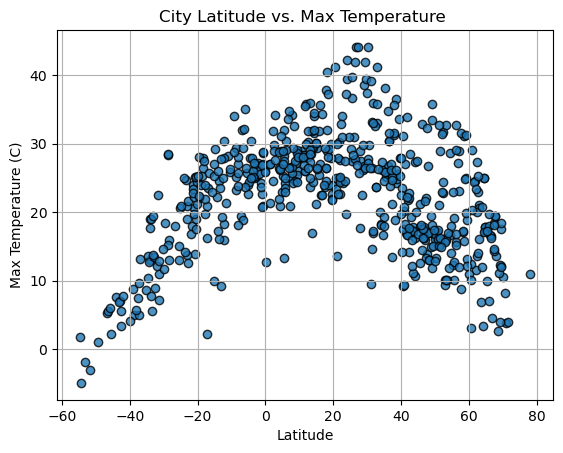

In [86]:
# Build scatter plot for latitude vs. temperature
latitudes = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
plt.scatter(latitudes, max_temps, edgecolors='black', linewidths=1, marker='o', alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

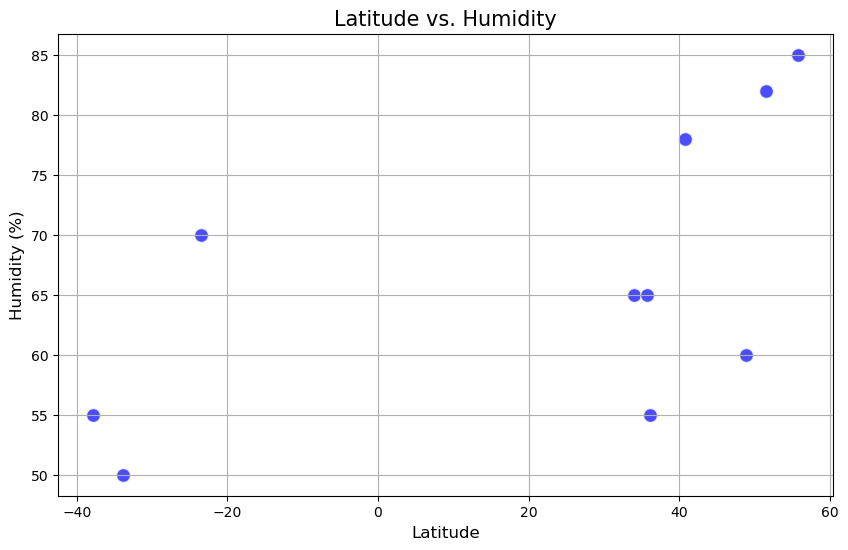

In [87]:
# Build the scatter plots for latitude vs. humidity
df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
plt.scatter(df['latitude'], df['humidity'], c='blue', edgecolors='w', alpha=0.7, s=100)

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity (%)', fontsize=12)
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

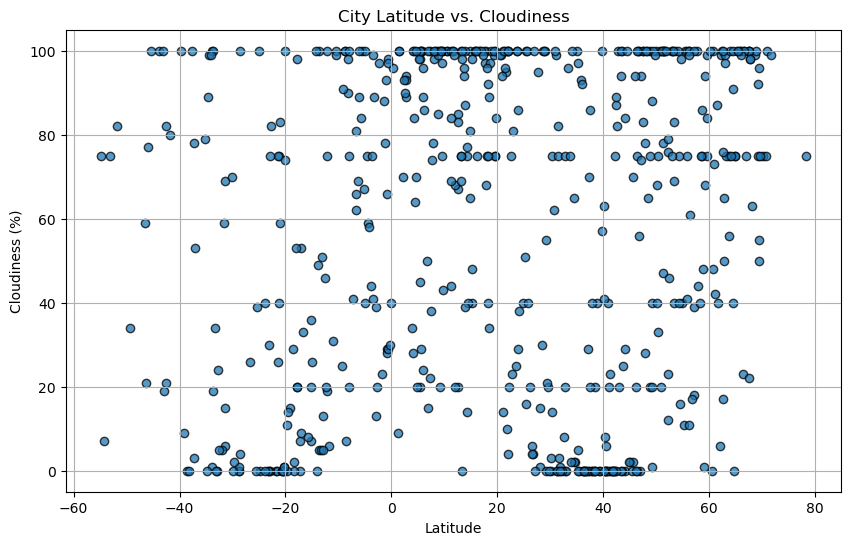

In [88]:
# Build the scatter plot for Latitude vs. Cloudiness
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.75)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

plt.savefig("output_data/Fig3.png")
plt.show()


#### Latitude vs. Wind Speed Plot

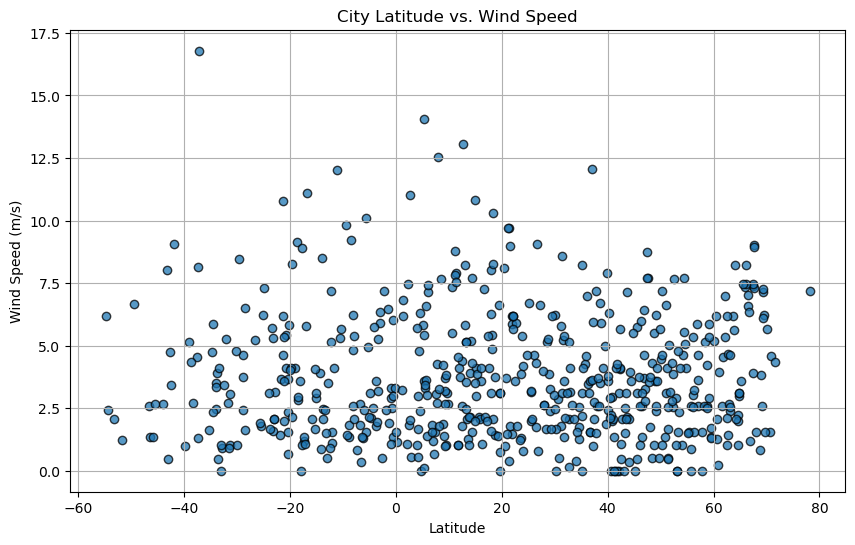

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.75)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


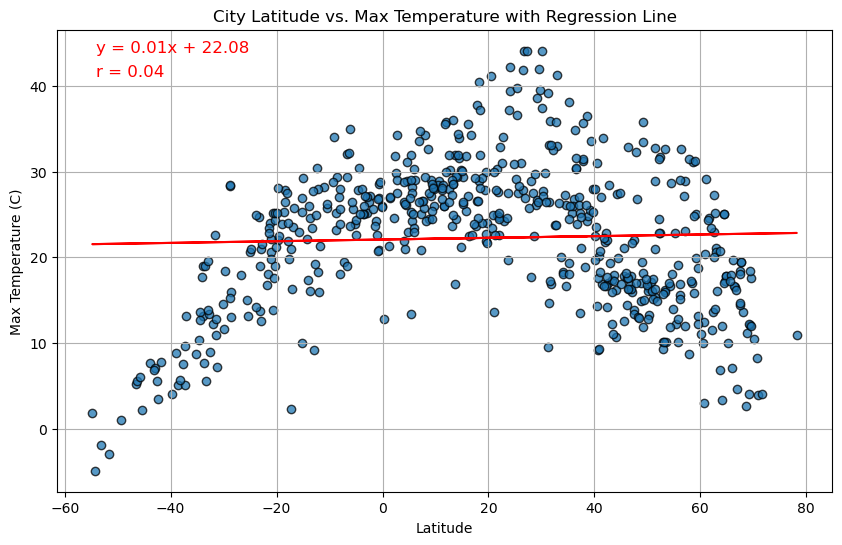

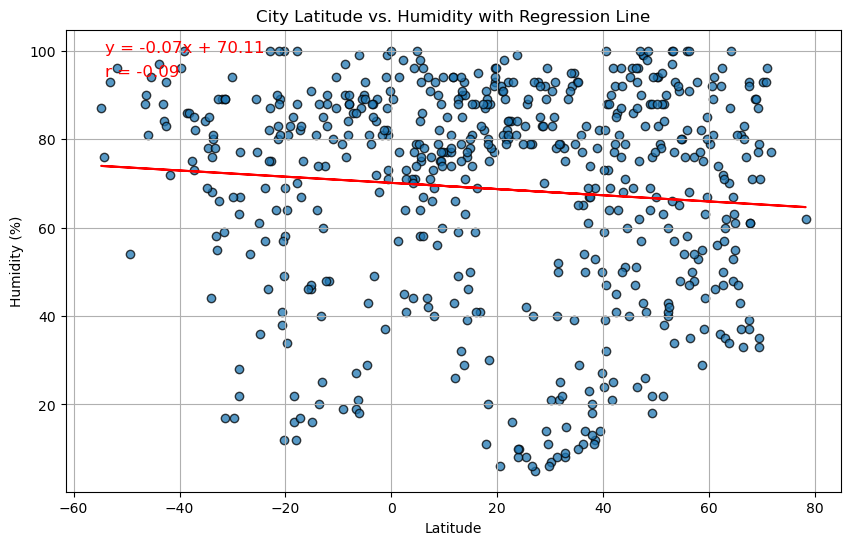

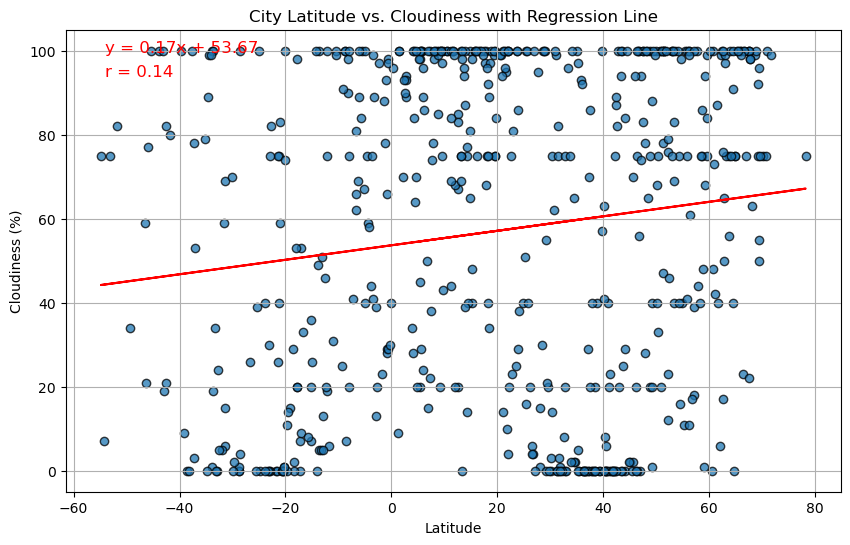

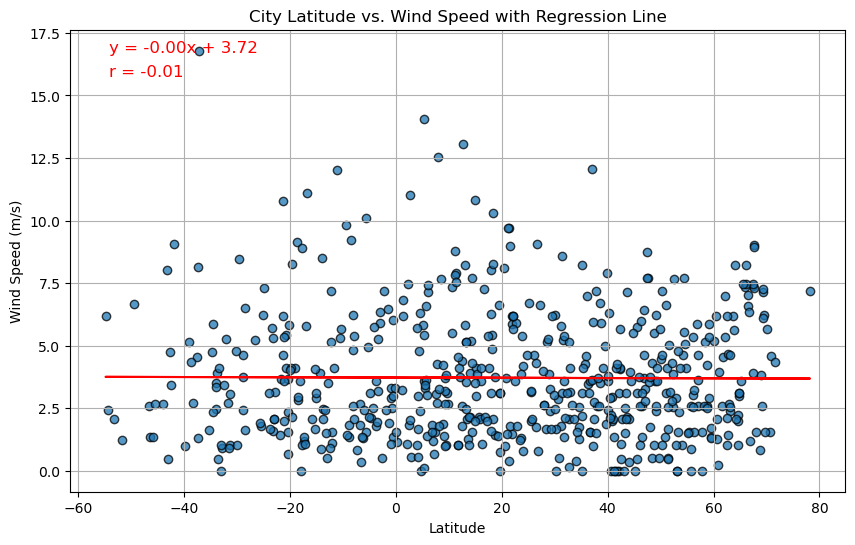

In [90]:
# Compute linear regression and create plots for each relationship

# 1. Latitude vs. Max Temperature
create_linear_regression_plot(
    city_data_df['Lat'],
    city_data_df['Max Temp'],
    'City Latitude vs. Max Temperature with Regression Line',
    'Latitude',
    'Max Temperature (C)',
    'output_data/LatitudevsMax.png'
)

# 2. Latitude vs. Humidity
create_linear_regression_plot(
    city_data_df['Lat'],
    city_data_df['Humidity'],
    'City Latitude vs. Humidity with Regression Line',
    'Latitude',
    'Humidity (%)',
    'output_data/LatvsHum.png'
)

# 3. Latitude vs. Cloudiness
create_linear_regression_plot(
    city_data_df['Lat'],
    city_data_df['Cloudiness'],
    'City Latitude vs. Cloudiness with Regression Line',
    'Latitude',
    'Cloudiness (%)',
    'output_data/LatvsCloud.png'
)

# 4. Latitude vs. Wind Speed
create_linear_regression_plot(
    city_data_df['Lat'],
    city_data_df['Wind Speed'],
    'City Latitude vs. Wind Speed with Regression Line',
    'Latitude',
    'Wind Speed (m/s)',
    'output_data/LatvsWind.png'
)


In [91]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,24.22,69,20,6.71,PT,1720001863
2,nagqu,31.5000,92.0000,14.61,52,82,5.23,CN,1720001867
4,naze,28.3667,129.4833,27.51,83,30,1.66,JP,1720001871
7,bethel,41.3712,-73.4140,16.93,90,0,0.00,US,1720001877
8,anadyr,64.7500,177.4833,17.28,63,0,3.00,RU,1720001596


In [92]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-4.93,76,7,2.43,GS,1720001865
3,edinburgh of the seven seas,-37.0676,-12.3116,13.16,82,53,16.79,SH,1720001869
5,waitangi,-43.9535,-176.5597,7.68,97,100,2.68,NZ,1720001873
6,adamstown,-25.0660,-130.1015,20.62,61,100,6.22,PN,1720001875
13,kerikeri,-35.2268,173.9474,8.66,84,79,1.61,NZ,1720001890


###  Temperature vs. Latitude Linear Regression Plot

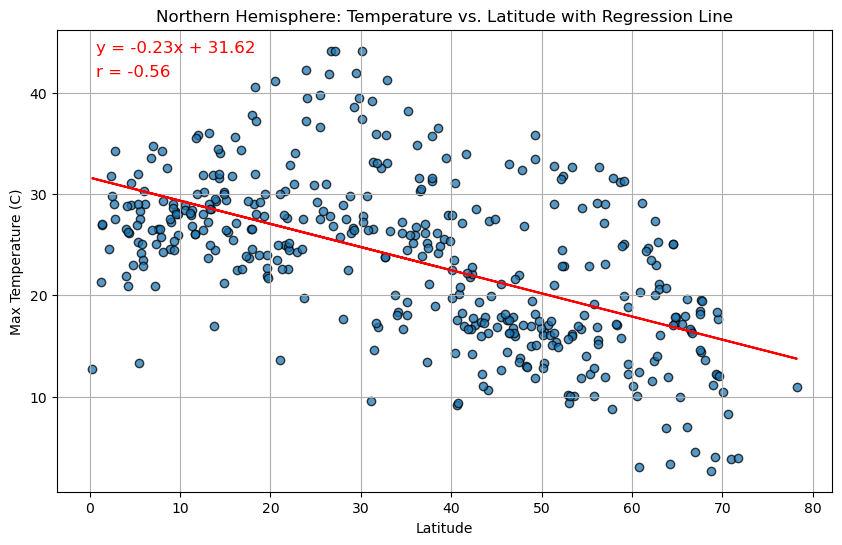

In [103]:
# Linear regression on Northern Hemisphere
# Northern Hemisphere: Temperature (C) vs. Latitude
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    'Northern Hemisphere: Temperature vs. Latitude with Regression Line',
    'Latitude',
    'Max Temperature (C)',
    'output_data/NH_Temp_vs_Latitude.png'
)


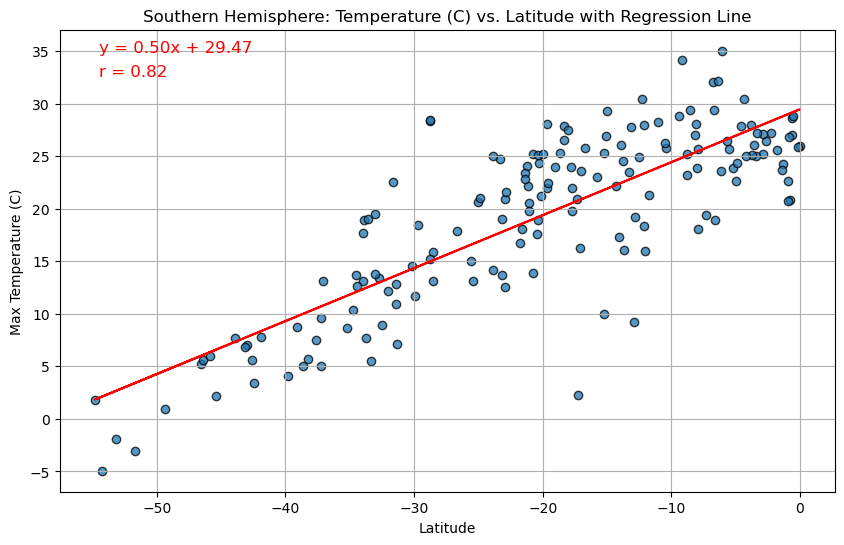

In [104]:
# Linear regression on Southern Hemisphere
# Southern Hemisphere: Temperature (C) vs. Latitude
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp'],
    'Southern Hemisphere: Temperature (C) vs. Latitude with Regression Line',
    'Latitude',
    'Max Temperature (C)',
    'output_data/SH_Temp_vs_Latitude.png'
)

**Discussion about the linear relationship:**  There is a clear trend in both hemispheres where temperatures drop as you move away from the equator.

### Humidity vs. Latitude Linear Regression Plot

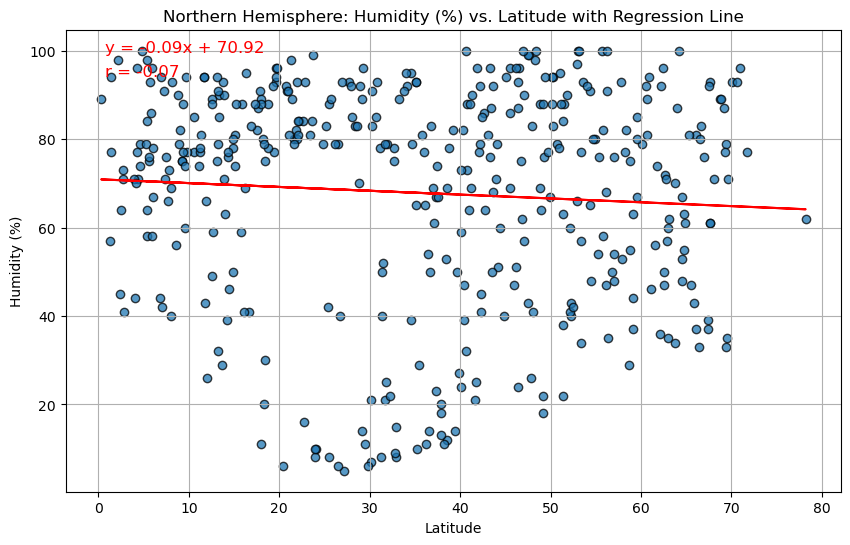

In [105]:
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    'Northern Hemisphere: Humidity (%) vs. Latitude with Regression Line',
    'Latitude',
    'Humidity (%)',
    'output_data/NH_Humidity_vs_Latitude.png'
)

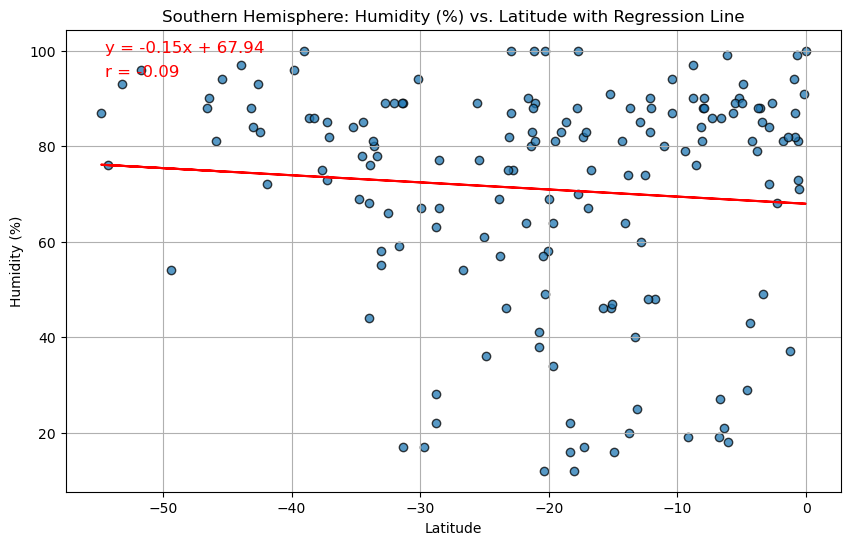

In [106]:
# Southern Hemisphere
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    'Southern Hemisphere: Humidity (%) vs. Latitude with Regression Line',
    'Latitude',
    'Humidity (%)',
    'output_data/SH_Humidity_vs_Latitude.png'
)

**Discussion about the linear relationship:** In both hemispheres, temperatures drop as you move further from the equator, but this effect is less noticeable in the Southern Hemisphere due to the larger ocean areas that balance out the temperatures.

### Cloudiness vs. Latitude Linear Regression Plot

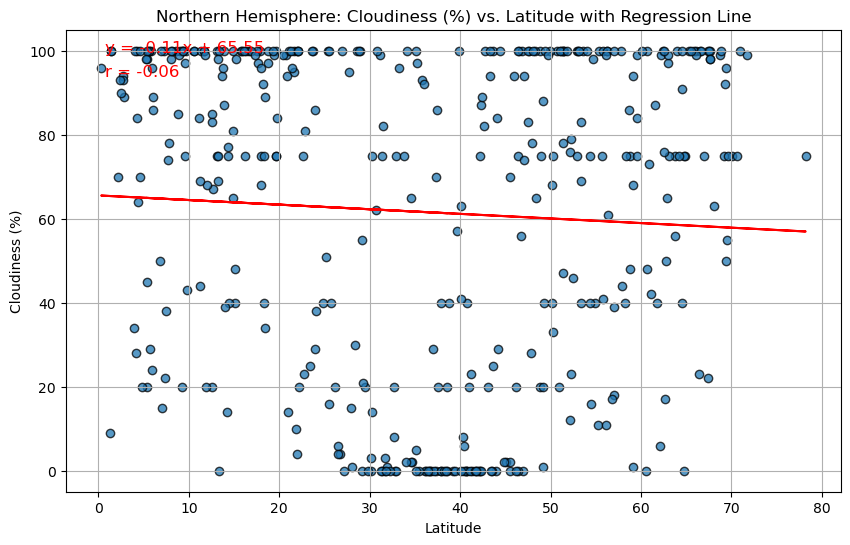

In [107]:
# Northern Hemisphere: Cloudiness (%) vs. Latitude
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    'Northern Hemisphere: Cloudiness (%) vs. Latitude with Regression Line',
    'Latitude',
    'Cloudiness (%)',
    'output_data/NH_Cloudiness_vs_Latitude.png'
)

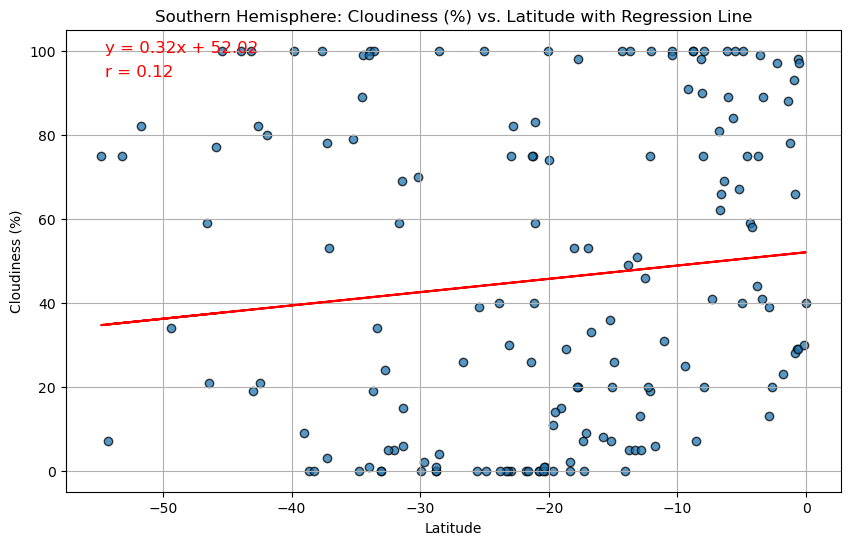

In [108]:
# Southern Hemisphere
# Southern Hemisphere: Cloudiness (%) vs. Latitude
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    'Southern Hemisphere: Cloudiness (%) vs. Latitude with Regression Line',
    'Latitude',
    'Cloudiness (%)',
    'output_data/SH_Cloudiness_vs_Latitude.png'
)


**Discussion about the linear relationship:** Cloudiness does not show a strong relationship with latitude in either hemisphere. Local weather patterns, geographical features, and oceanic influences play a more significant role in determining cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

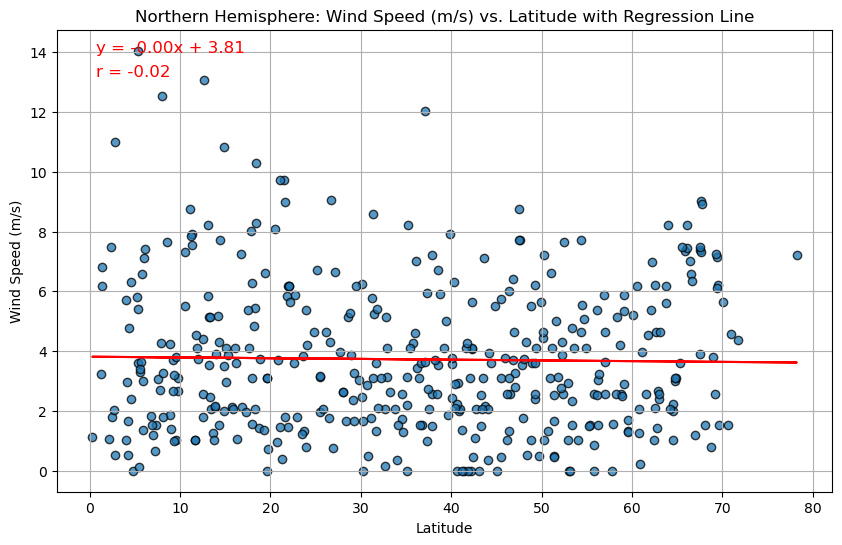

In [110]:
# Northern Hemisphere: Wind Speed (m/s) vs. Latitude
create_linear_regression_plot(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    'Northern Hemisphere: Wind Speed (m/s) vs. Latitude with Regression Line',
    'Latitude',
    'Wind Speed (m/s)',
    'output_data/NH_WindSpeed_vs_Latitude.png'
)

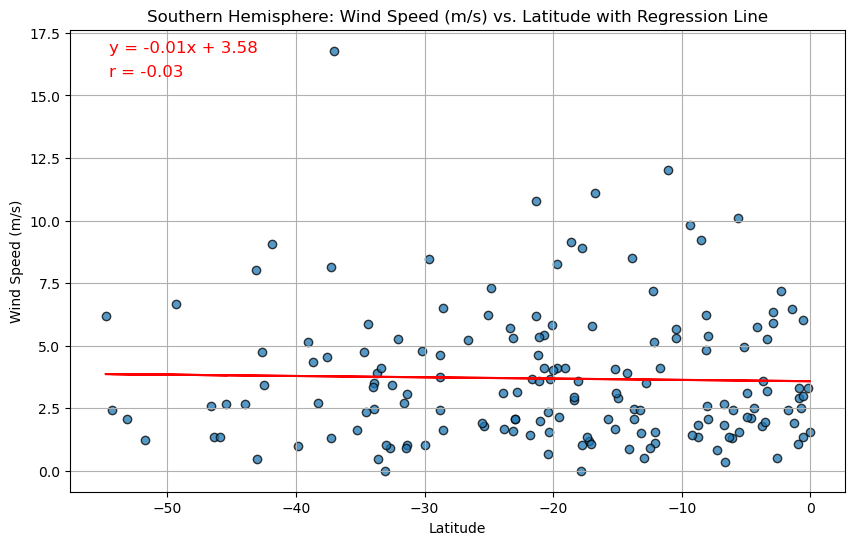

In [111]:
# Southern Hemisphere
# Southern Hemisphere: Wind Speed (m/s) vs. Latitude
create_linear_regression_plot(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    'Southern Hemisphere: Wind Speed (m/s) vs. Latitude with Regression Line',
    'Latitude',
    'Wind Speed (m/s)',
    'output_data/SH_WindSpeed_vs_Latitude.png'
)

**Discussion about the linear relationship:** Wind speeds tend to go up as you move north in the Northern Hemisphere. In the Southern Hemisphere, this effect is weaker because the large oceans help to even out the wind patterns.